In [1]:
from cloudpathlib import AnyPath
from sertit import vectors
from eosets.pair import Pair
from eoreader.bands import NBR
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"), log_lvl=logging.INFO)
logs.init_logger(logging.getLogger("eosets"))

In [3]:
# Get the base paths
data_path = AnyPath(r"/home/ds2_db3/CI/eosets/PAIR")

In [4]:
# Get a dictionary of Sentinel-2, Sentinel-3 and Landsat-8 pivot and child images
s2_paths = {
    "pivot_paths": [data_path / "S2A_MSIL1C_20200824T110631_N0209_R137_T29TQE_20200824T150432.zip"],
    "child_paths": [data_path / "S2B_MSIL1C_20200908T110619_N0209_R137_T29TQE_20200908T132324.zip"],
}

s3_paths = {
    "pivot_paths": [data_path / "S3B_SL_1_RBT____20200824T105515_20200824T105815_20200825T151744_0179_042_322_2340_LN2_O_NT_004.SEN3"],
    "child_paths": [data_path / "S3B_SL_1_RBT____20200909T104016_20200909T104316_20200910T161910_0179_043_165_2340_LN2_O_NT_004.SEN3"],
}

l8_paths = {
    "pivot_paths": [data_path / "LC08_L1TP_202032_20200828_20200906_02_T1.tar"],
    "child_paths": [data_path / "LC08_L1TP_202032_20200929_20201006_02_T1.tar"],
}

all_paths = [s2_paths, s3_paths, l8_paths]

aoi_path = data_path / "Fire_Spain.geojson"

2023-04-28 16:07:27,460 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***


2023-04-28 16:07:29,244 - [DEBUG] - Merging bands NBR


2023-04-28 16:07:29,313 - [DEBUG] - Collocating bands


2023-04-28 16:07:29,334 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-04-28 16:07:30,935 - [DEBUG] - Merging bands NBR


2023-04-28 16:07:30,996 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


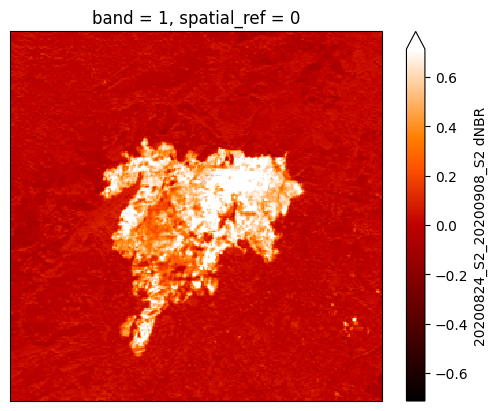

2023-04-28 16:07:43,143 - [DEBUG] - *** Loading ['NBR'] for 20200824T105515_S3_SLSTR_RBT ***


2023-04-28 16:07:57,810 - [DEBUG] - Merging bands NBR


2023-04-28 16:07:57,872 - [DEBUG] - Collocating bands


2023-04-28 16:07:57,894 - [DEBUG] - *** Loading ['NBR'] for 20200909T104016_S3_SLSTR_RBT ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-04-28 16:08:12,644 - [DEBUG] - Merging bands NBR


2023-04-28 16:08:12,705 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


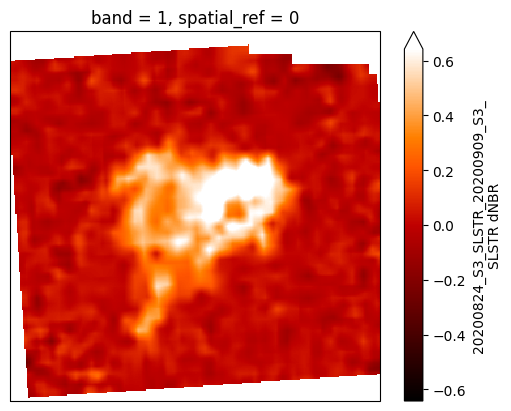

2023-04-28 16:08:17,701 - [DEBUG] - *** Loading ['NBR'] for 20200828T110153_L8_202032_OLI_TIRS ***


2023-04-28 16:08:18,217 - [DEBUG] - Merging bands NBR


2023-04-28 16:08:18,277 - [DEBUG] - Collocating bands


2023-04-28 16:08:18,300 - [DEBUG] - *** Loading ['NBR'] for 20200929T110204_L8_202032_OLI_TIRS ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-04-28 16:08:19,490 - [DEBUG] - Merging bands NBR


2023-04-28 16:08:19,553 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


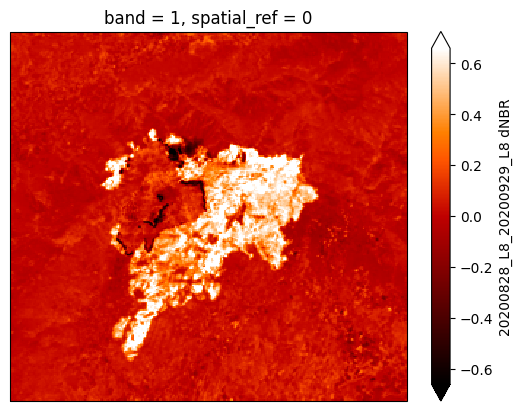

In [5]:
for paths in all_paths:
    # Create pair with pivot and child paths
    pair = Pair(**paths)

    # Load dNBR
    _, _, dnbr = pair.load(
        diff_bands=NBR,
        window=aoi_path,
        pixel_size=60
    )
    dnbr = dnbr[NBR]
    dnbr.attrs["long_name"] = f"{pair.condensed_name} dNBR"

    # Plot the pairs
    crs = ccrs.UTM(str(dnbr.rio.crs.to_epsg())[-2:])
    dnbr.plot(
        robust=True,
        transform=crs,
        x="x",
        y="y",
        cmap="gist_heat",
        subplot_kws={'projection':crs}
    )
    plt.show()